## Build dataset for binary classifier

In [1]:
import os
import itertools
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
import pandas as pd
from tqdm import tqdm

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")




In [2]:
original_data_path = '../data/original'
filepaths = [os.path.join(original_data_path, f) for f in os.listdir(original_data_path) if f!='.DS_Store']

filepaths

['../data/original/Columbus Zoo',
 '../data/original/Cincinnati Zoo',
 '../data/original/National Zoo',
 '../data/original/Clean',
 '../data/original/._.DS_Store']

In [3]:
include_folders = ['../data/original/National Zoo',
 '../data/original/Cincinnati Zoo',
 '../data/original/Columbus Zoo']

## Labels

In [14]:
data_folders = include_folders
labels = []

def get_labels(foldername):
    labels = [f for f in os.listdir(foldername) if f not in [".DS_Store",'._.DS_Store']]
    return labels

In [15]:
values = map(get_labels, data_folders)
labels.extend(values)
labels = list(itertools.chain(*labels))

In [16]:
labels

['Spike',
 'Swarna',
 'Kamala',
 'Maharani',
 'Schottzie',
 'Sabu',
 'Jati',
 'MyThai',
 'Sunny',
 'Connie',
 'Rudy',
 'Beco',
 'Pheobe',
 'Hank']

In [17]:
print(f" Labels: {labels}, \n No of labels:{len(labels)}")

 Labels: ['Spike', 'Swarna', 'Kamala', 'Maharani', 'Schottzie', 'Sabu', 'Jati', 'MyThai', 'Sunny', 'Connie', 'Rudy', 'Beco', 'Pheobe', 'Hank'], 
 No of labels:14


### All Images

In [18]:
data = {}
data['filepath']=[]
data['image']=[]
data['imagename'] = []
data['label'] = []
data["extension"] = []

extension = set()
empty_files = set()

for image_folder in data_folders:
    for (dirpath, dirnames, filenames) in os.walk(image_folder):
        if dirnames == ".DS_Store":
            continue
            
        for f in tqdm(filenames):
            
            if f == ".DS_Store":
                continue
            
            ## check image
            size = os.stat(os.path.join(dirpath,f)).st_size
            
            if size == 0:
                empty_files.add(os.path.join(dirpath,f))
                continue
                
            ## found two images - odd images - Hank_IMG_6061.JPG, Connie_IMG_3589
            label = os.path.basename(dirpath)
            imagename = f"{label}_{f}"
            
            
            
            if imagename in ['Connie_IMG_3589.JPG','Hank_IMG_6061.JPG']:
                print("Ignoring image ",imagename)
                continue
            
            filename, file_extension = os.path.splitext(f)
            
            ## check image files
            if file_extension==".JPG":
                img = cv2.imread(os.path.join(dirpath, f))
                if img is None:
                    continue
            
                if len(img.shape)!=3:
                    print(img.shape)
                    continue
                    
            data["extension"].append(file_extension)
            data['label'].append(label)
            data['image'].append(f)
            data['imagename'].append(imagename)
            data['filepath'].append(os.path.join(dirpath, f))

100%|██████████| 756/756 [02:49<00:00,  4.01it/s]
0it [00:00, ?it/s]
 13%|█▎        | 292/2190 [01:03<06:06,  5.17it/s]

Ignoring image  Connie_IMG_3589.JPG


 84%|████████▍ | 1902/2265 [07:44<01:27,  4.13it/s]

Ignoring image  Hank_IMG_6061.JPG


100%|██████████| 2265/2265 [09:10<00:00,  3.24it/s]


In [19]:
df = pd.DataFrame(data)

In [20]:
print(f" No of files found: {df.shape[0]}")

 No of files found: 19184


## Exploratory Data Analysis

In [21]:
df["extension"].value_counts()

.JPG         18136
.MOV          1045
.DS_Store        2
.AAE             1
Name: extension, dtype: int64

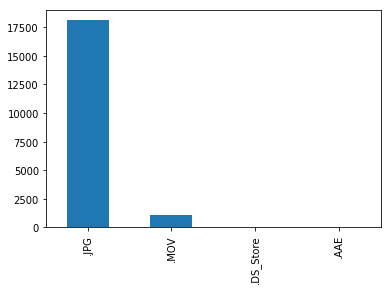

In [22]:
df["extension"].value_counts().plot(kind="bar")

Pheobe            2539
Hank              2263
Connie            2189
Rudy              1897
Swarna            1553
Beco              1339
Maharani          1276
Spike             1271
Kamala            1066
Sunny             1049
Sabu               817
MyThai             756
Jati               592
Schottzie          575
National Zoo         1
Cincinnati Zoo       1
Name: label, dtype: int64

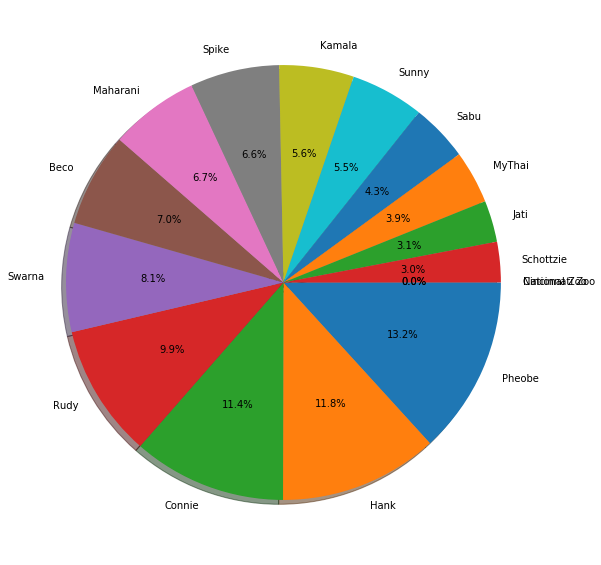

In [23]:
plt.figure(figsize=(20,10))
cnts = list(df["label"].value_counts())
cnts = [(i/sum(cnts))*100 for i in cnts]

#colors = ['b', 'g', 'r', 'c', 'm', 'y']

plt.pie(cnts, labels=df["label"].value_counts().keys(),
autopct='%1.1f%%',
counterclock=False, shadow=True)


df["label"].value_counts()

In [24]:
df.head()

,filepath,image,imagename,label,extension
0,../data/original/National Zoo/._.DS_Store,._.DS_Store,National Zoo_._.DS_Store,National Zoo,.DS_Store
1,../data/original/National Zoo/Spike/IMG_0941.JPG,IMG_0941.JPG,Spike_IMG_0941.JPG,Spike,.JPG
2,../data/original/National Zoo/Spike/IMG_0443.JPG,IMG_0443.JPG,Spike_IMG_0443.JPG,Spike,.JPG
3,../data/original/National Zoo/Spike/IMG_0778.JPG,IMG_0778.JPG,Spike_IMG_0778.JPG,Spike,.JPG
4,../data/original/National Zoo/Spike/IMG_1047.JPG,IMG_1047.JPG,Spike_IMG_1047.JPG,Spike,.JPG


### Display grid of images

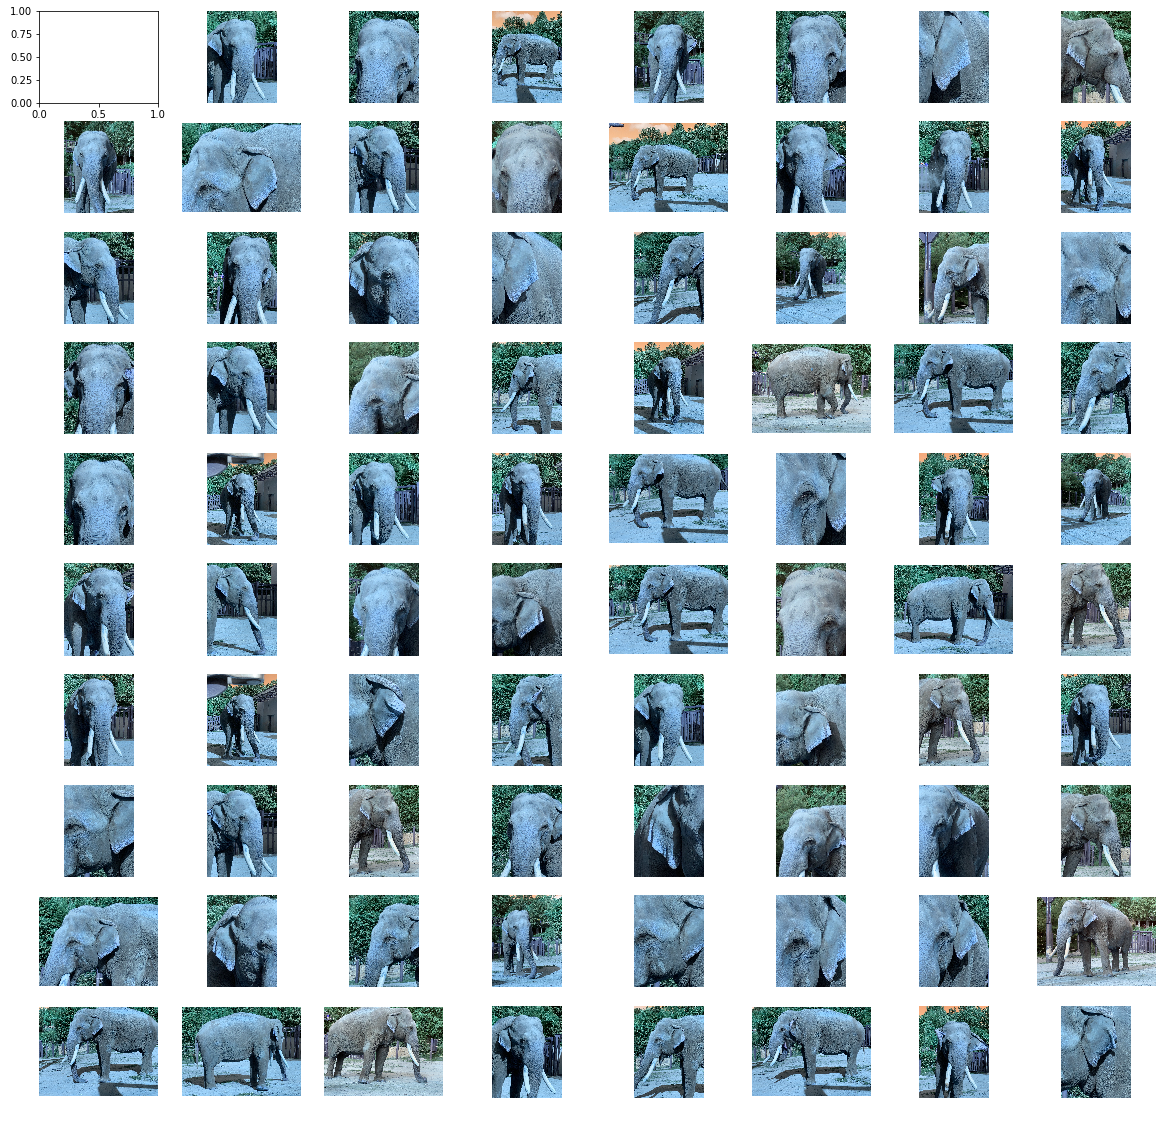

In [27]:
import imageio
from IPython.display import display, Image

def show_images(df):
    n_row = 10
    n_col = 8
    _, axs = plt.subplots(n_row, n_col, figsize=(20, 20))
    axs = axs.flatten()
    imgs = df.loc[:100,["filepath"]].values.astype(str)
    
    for img, ax in zip(imgs, axs):
        filename, file_extension = os.path.splitext(img[0])
        if file_extension in [".DS_Store",".AAE"]:
            continue
        
        ax.imshow(cv2.imread(img[0]))
        ax.grid(False)
        ax.axis("off")
    
    plt.axis("off")
    plt.show()
    
    
show_images(df)

In [28]:
print(f"No of empty files: {len(empty_files)}")

No of empty files: 1


In [29]:
## Test cv2 resize


### Resize and copy to the folder

In [30]:
## resize:

## Create images from mov files
#dim = (227, 227) - not resizing
width = 224
height = 224
dim = (width, height)

def getFrame(vidcap,sec,path):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        print('Original Dimensions : ',image.shape)
        resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
        cv2.imwrite(path, resized)     # save frame as JPG file
    return hasFrames

def get_images(save_path, video_file_path,filename):
    frameRate = 0.5 # capture image in each 0.5 second
    image_write_path  = lambda count: os.path.join(save_path,"%s_frame%d.jpg" % (filename,count))
    count=1
    sec = 0
    vidcap = cv2.VideoCapture(video_file_path)
    success = getFrame(vidcap,sec,image_write_path(count))
    while success:
        count = count + 1
        sec = sec + frameRate
        sec = round(sec, 2)
        success = getFrame(vidcap,sec,image_write_path(count))
        

def resize_image(imgpath,savepath, dim=dim):
    image = cv2.imread(imgpath)
    # resize image
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    cv2.imwrite(savepath, resized)
    return



In [32]:
save_path = os.path.join("../data/binary-classifier/")
def save_images(df):
    for idx, row in tqdm(df.iterrows()):
        extension = row["extension"]
        current_file_path = row["filepath"]
        label = row["label"]
        newimagename = row["imagename"]
        
        if extension==".MOV":
            ## get frame and resize and save
            get_images(save_path, current_file_path,newimagename)
        
        elif extension==".JPG":
            ## copying image without resizing
            resize_image(current_file_path, os.path.join(save_path,newimagename))  
        
        else:
            print(current_file_path)
            continue

In [33]:
save_images(df)

0it [00:00, ?it/s]

../data/original/National Zoo/._.DS_Store


1310it [07:48,  2.92it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


1311it [07:49,  2.26it/s]

Original Dimensions :  (1080, 1440, 3)


1315it [07:50,  2.77it/s]

Original Dimensions :  (1080, 1440, 3)


1329it [07:55,  2.81it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


1330it [07:56,  2.23it/s]

Original Dimensions :  (1080, 1440, 3)


1419it [08:24,  2.90it/s]

Original Dimensions :  (1080, 1440, 3)


1490it [08:47,  2.79it/s]

Original Dimensions :  (1080, 1440, 3)


1554it [09:10,  3.14it/s]

Original Dimensions :  (1080, 1440, 3)


1589it [09:21,  3.00it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


1607it [09:27,  2.96it/s]

Original Dimensions :  (1080, 1440, 3)


1617it [09:30,  3.10it/s]

Original Dimensions :  (1080, 1440, 3)


1724it [10:05,  3.28it/s]

Original Dimensions :  (1080, 1440, 3)


1727it [10:06,  3.36it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


1734it [10:09,  2.79it/s]

Original Dimensions :  (1080, 1440, 3)


1737it [10:10,  2.76it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


1738it [10:11,  2.23it/s]

Original Dimensions :  (1080, 1440, 3)


1750it [10:15,  2.89it/s]

Original Dimensions :  (1080, 1440, 3)


1772it [10:22,  2.97it/s]

Original Dimensions :  (1080, 1440, 3)


1781it [10:25,  3.03it/s]

Original Dimensions :  (1080, 1440, 3)


1805it [10:33,  2.96it/s]

Original Dimensions :  (1080, 1440, 3)


1812it [10:36,  3.00it/s]

Original Dimensions :  (1080, 1440, 3)


1851it [10:49,  3.03it/s]

Original Dimensions :  (1080, 1440, 3)


1878it [10:57,  2.97it/s]

Original Dimensions :  (1080, 1440, 3)


1892it [11:01,  2.95it/s]

Original Dimensions :  (1080, 1440, 3)


1897it [11:03,  2.99it/s]

Original Dimensions :  (1080, 1440, 3)


1899it [11:04,  2.91it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


1909it [11:07,  2.94it/s]

Original Dimensions :  (1080, 1440, 3)


1992it [11:34,  3.25it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


2012it [11:41,  3.11it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


2017it [11:43,  2.73it/s]

Original Dimensions :  (1080, 1440, 3)


2032it [11:48,  3.14it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


2035it [11:49,  2.45it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


2047it [11:54,  3.03it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


2166it [12:33,  2.91it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


2180it [12:38,  3.06it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


2181it [12:38,  2.33it/s]

Original Dimensions :  (1080, 1440, 3)


2197it [12:44,  2.66it/s]

Original Dimensions :  (1080, 1440, 3)


2219it [12:51,  2.88it/s]

Original Dimensions :  (1080, 1440, 3)


2221it [12:52,  2.89it/s]

Original Dimensions :  (1080, 1440, 3)


2233it [12:56,  2.90it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


2234it [12:57,  2.23it/s]

Original Dimensions :  (1080, 1440, 3)


2251it [13:02,  2.92it/s]

Original Dimensions :  (1080, 1440, 3)


2298it [13:18,  2.77it/s]

Original Dimensions :  (1080, 1440, 3)


2317it [13:24,  3.08it/s]

Original Dimensions :  (1080, 1440, 3)


2333it [13:29,  3.00it/s]

Original Dimensions :  (1080, 1440, 3)


2382it [13:46,  2.80it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


2383it [13:47,  1.89it/s]

Original Dimensions :  (1080, 1440, 3)


2385it [13:47,  2.21it/s]

Original Dimensions :  (1080, 1440, 3)


2390it [13:49,  2.96it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


2391it [13:50,  2.22it/s]

Original Dimensions :  (1080, 1440, 3)


2410it [13:56,  3.04it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


2411it [13:57,  2.29it/s]

Original Dimensions :  (1080, 1440, 3)


2442it [14:07,  2.71it/s]

Original Dimensions :  (1080, 1440, 3)


2450it [14:10,  3.22it/s]

Original Dimensions :  (1080, 1440, 3)


2452it [14:10,  2.97it/s]

Original Dimensions :  (1080, 1440, 3)


2476it [14:18,  3.11it/s]

Original Dimensions :  (1080, 1440, 3)


2500it [14:25,  3.83it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


2501it [14:26,  2.58it/s]

Original Dimensions :  (1080, 1440, 3)


2545it [14:40,  2.98it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


2572it [14:49,  3.09it/s]

Original Dimensions :  (1080, 1440, 3)


2631it [15:09,  2.89it/s]

Original Dimensions :  (1080, 1440, 3)


2634it [15:10,  2.92it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


2642it [15:13,  2.89it/s]

Original Dimensions :  (1080, 1440, 3)


2657it [15:17,  2.84it/s]

Original Dimensions :  (1080, 1440, 3)


2673it [15:23,  2.70it/s]

Original Dimensions :  (1080, 1440, 3)


2726it [15:40,  3.04it/s]

Original Dimensions :  (1080, 1440, 3)


2766it [15:54,  2.80it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


2771it [15:56,  2.61it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


2772it [15:57,  2.16it/s]

Original Dimensions :  (1080, 1440, 3)


2779it [15:59,  3.00it/s]

Original Dimensions :  (1080, 1440, 3)


5167it [28:44,  3.23it/s]

../data/original/Cincinnati Zoo/._.DS_Store


7569it [39:16,  3.94it/s]

../data/original/Cincinnati Zoo/MyThai/IMG_3617.AAE


7956it [40:59,  4.06it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


7961it [41:01,  3.41it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


7962it [41:02,  2.31it/s]

Original Dimensions :  (1080, 1440, 3)


7995it [41:10,  3.49it/s]

Original Dimensions :  (1080, 1440, 3)


8003it [41:13,  3.08it/s]

Original Dimensions :  (1080, 1440, 3)


8008it [41:14,  3.18it/s]

Original Dimensions :  (1080, 1440, 3)


8014it [41:16,  3.40it/s]

Original Dimensions :  (1080, 1440, 3)


8017it [41:17,  3.78it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


8022it [41:19,  2.98it/s]

Original Dimensions :  (1080, 1440, 3)


8036it [41:22,  2.96it/s]

Original Dimensions :  (1080, 1440, 3)


8048it [41:26,  3.11it/s]

Original Dimensions :  (1080, 1440, 3)


8063it [41:29,  3.37it/s]

Original Dimensions :  (1080, 1440, 3)


8090it [41:37,  3.22it/s]

Original Dimensions :  (1080, 1440, 3)


8110it [41:42,  3.12it/s]

Original Dimensions :  (1080, 1440, 3)


8142it [41:50,  3.26it/s]

Original Dimensions :  (1080, 1440, 3)


8144it [41:51,  3.19it/s]

Original Dimensions :  (1080, 1440, 3)


8184it [42:02,  3.18it/s]

Original Dimensions :  (1080, 1440, 3)


8190it [42:03,  3.03it/s]

Original Dimensions :  (1080, 1440, 3)


8209it [42:08,  3.23it/s]

Original Dimensions :  (1080, 1440, 3)


8257it [42:20,  3.99it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


8294it [42:30,  3.34it/s]

Original Dimensions :  (1080, 1440, 3)


8297it [42:31,  2.77it/s]

Original Dimensions :  (1080, 1440, 3)


8343it [42:43,  3.17it/s]

Original Dimensions :  (1080, 1440, 3)


8344it [42:44,  2.89it/s]

Original Dimensions :  (1080, 1440, 3)


8386it [42:55,  4.16it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


8387it [42:55,  2.82it/s]

Original Dimensions :  (1080, 1440, 3)


8389it [42:56,  3.33it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


8458it [43:14,  4.11it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


8459it [43:14,  2.53it/s]

Original Dimensions :  (1080, 1440, 3)


8489it [43:22,  3.71it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


8522it [43:31,  3.23it/s]

Original Dimensions :  (1080, 1440, 3)


8528it [43:32,  3.28it/s]

Original Dimensions :  (1080, 1440, 3)


8580it [43:45,  3.32it/s]

Original Dimensions :  (1080, 1440, 3)


8588it [43:48,  3.39it/s]

Original Dimensions :  (1080, 1440, 3)


8592it [43:49,  3.25it/s]

Original Dimensions :  (1080, 1440, 3)


8634it [43:59,  4.02it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


8636it [44:00,  2.78it/s]

Original Dimensions :  (1080, 1440, 3)


8638it [44:01,  2.97it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


8650it [44:04,  3.82it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


8662it [44:08,  3.18it/s]

Original Dimensions :  (1080, 1440, 3)


8680it [44:13,  3.05it/s]

Original Dimensions :  (1080, 1440, 3)


8696it [44:18,  2.93it/s]

Original Dimensions :  (1080, 1440, 3)


8712it [44:22,  3.41it/s]

Original Dimensions :  (1080, 1440, 3)


8716it [44:23,  3.32it/s]

Original Dimensions :  (1080, 1440, 3)


8720it [44:24,  3.16it/s]

Original Dimensions :  (1080, 1440, 3)


8728it [44:26,  4.10it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


8729it [44:27,  2.54it/s]

Original Dimensions :  (1080, 1440, 3)


8781it [44:40,  4.01it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


8789it [44:43,  3.39it/s]

Original Dimensions :  (1080, 1440, 3)


8792it [44:44,  3.04it/s]

Original Dimensions :  (1080, 1440, 3)


8795it [44:45,  2.98it/s]

Original Dimensions :  (1080, 1440, 3)


8799it [44:46,  3.09it/s]

Original Dimensions :  (1080, 1440, 3)


8849it [44:59,  3.28it/s]

Original Dimensions :  (1080, 1440, 3)


8875it [45:05,  4.01it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


8882it [45:08,  3.24it/s]

Original Dimensions :  (1080, 1440, 3)


8883it [45:08,  2.99it/s]

Original Dimensions :  (1080, 1440, 3)


8892it [45:11,  3.28it/s]

Original Dimensions :  (1080, 1440, 3)


8908it [45:15,  3.24it/s]

Original Dimensions :  (1080, 1440, 3)


8917it [45:17,  3.82it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


8953it [45:28,  3.13it/s]

Original Dimensions :  (1080, 1440, 3)


8973it [45:34,  3.05it/s]

Original Dimensions :  (1080, 1440, 3)


9032it [45:50,  2.93it/s]

Original Dimensions :  (1080, 1440, 3)


9045it [45:54,  2.79it/s]

Original Dimensions :  (1080, 1440, 3)


9063it [45:59,  2.83it/s]

Original Dimensions :  (1080, 1440, 3)


9074it [46:03,  2.75it/s]

Original Dimensions :  (1080, 1440, 3)


9080it [46:05,  3.38it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


9081it [46:05,  2.50it/s]

Original Dimensions :  (1080, 1440, 3)


9090it [46:08,  3.07it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


9108it [46:14,  2.85it/s]

Original Dimensions :  (1080, 1440, 3)


9112it [46:15,  3.43it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


9125it [46:19,  3.29it/s]

Original Dimensions :  (1080, 1440, 3)


9142it [46:24,  3.62it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


9159it [46:29,  4.03it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


9180it [46:35,  3.32it/s]

Original Dimensions :  (1080, 1440, 3)


9205it [46:42,  3.32it/s]

Original Dimensions :  (1080, 1440, 3)


9214it [46:44,  3.05it/s]

Original Dimensions :  (1080, 1440, 3)


9253it [46:55,  3.38it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


9302it [47:09,  3.84it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


9305it [47:10,  2.82it/s]

Original Dimensions :  (1080, 1440, 3)


9339it [47:20,  3.11it/s]

Original Dimensions :  (1080, 1440, 3)


9340it [47:20,  2.99it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


9351it [47:24,  2.88it/s]

Original Dimensions :  (1080, 1440, 3)


9358it [47:26,  2.98it/s]

Original Dimensions :  (1080, 1440, 3)


9363it [47:27,  3.63it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


9406it [47:40,  3.09it/s]

Original Dimensions :  (1080, 1440, 3)


9423it [47:45,  2.78it/s]

Original Dimensions :  (1080, 1440, 3)


9426it [47:46,  2.68it/s]

Original Dimensions :  (1080, 1440, 3)


9445it [47:52,  2.90it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


9474it [48:01,  3.06it/s]

Original Dimensions :  (1080, 1440, 3)


9485it [48:04,  3.43it/s]

Original Dimensions :  (1080, 1440, 3)


9501it [48:08,  3.21it/s]

Original Dimensions :  (1080, 1440, 3)


9527it [48:16,  3.07it/s]

Original Dimensions :  (1080, 1440, 3)


9529it [48:17,  3.06it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


9530it [48:17,  2.35it/s]

Original Dimensions :  (1080, 1440, 3)


9544it [48:21,  3.19it/s]

Original Dimensions :  (1080, 1440, 3)


9569it [48:28,  3.04it/s]

Original Dimensions :  (1080, 1440, 3)


9578it [48:31,  3.00it/s]

Original Dimensions :  (1080, 1440, 3)


9593it [48:35,  2.80it/s]

Original Dimensions :  (1080, 1440, 3)


9600it [48:38,  2.90it/s]

Original Dimensions :  (1080, 1440, 3)


9631it [48:46,  3.14it/s]

Original Dimensions :  (1080, 1440, 3)


9674it [48:59,  2.98it/s]

Original Dimensions :  (1080, 1440, 3)


9677it [49:00,  3.19it/s]

Original Dimensions :  (1080, 1440, 3)


9741it [49:17,  3.71it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


9776it [49:28,  3.33it/s]

Original Dimensions :  (1080, 1440, 3)


9781it [49:29,  3.08it/s]

Original Dimensions :  (1080, 1440, 3)


9798it [49:34,  3.14it/s]

Original Dimensions :  (1080, 1440, 3)


9830it [49:43,  3.11it/s]

Original Dimensions :  (1080, 1440, 3)


9839it [49:46,  3.10it/s]

Original Dimensions :  (1080, 1440, 3)


9847it [49:48,  3.51it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


9848it [49:49,  2.50it/s]

Original Dimensions :  (1080, 1440, 3)


9859it [49:52,  3.01it/s]

Original Dimensions :  (1080, 1440, 3)


9881it [49:58,  3.20it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


9891it [50:01,  3.09it/s]

Original Dimensions :  (1080, 1440, 3)


9894it [50:02,  2.86it/s]

Original Dimensions :  (1080, 1440, 3)


9911it [50:07,  3.77it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


9912it [50:08,  2.52it/s]

Original Dimensions :  (1080, 1440, 3)


9937it [50:15,  2.99it/s]

Original Dimensions :  (1080, 1440, 3)


9961it [50:22,  3.08it/s]

Original Dimensions :  (1080, 1440, 3)


9977it [50:26,  3.41it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


9989it [50:30,  2.75it/s]

Original Dimensions :  (1080, 1440, 3)


9993it [50:32,  2.94it/s]

Original Dimensions :  (1080, 1440, 3)


10004it [50:35,  3.04it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


10022it [50:41,  3.37it/s]

Original Dimensions :  (1080, 1440, 3)


10024it [50:41,  2.96it/s]

Original Dimensions :  (1080, 1440, 3)


10052it [50:49,  3.46it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


10053it [50:50,  2.42it/s]

Original Dimensions :  (1080, 1440, 3)


10093it [51:01,  3.37it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


10094it [51:01,  2.32it/s]

Original Dimensions :  (1080, 1440, 3)


10105it [51:05,  2.73it/s]

Original Dimensions :  (1080, 1440, 3)


10126it [51:11,  3.64it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


10167it [51:23,  3.34it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


10173it [51:26,  2.73it/s]

Original Dimensions :  (1080, 1440, 3)


10181it [51:28,  3.29it/s]

Original Dimensions :  (1080, 1440, 3)


10183it [51:29,  3.07it/s]

Original Dimensions :  (1080, 1440, 3)


10184it [51:29,  3.07it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


10185it [51:30,  2.29it/s]

Original Dimensions :  (1080, 1440, 3)


10193it [51:32,  3.57it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


10194it [51:33,  2.42it/s]

Original Dimensions :  (1080, 1440, 3)


10199it [51:34,  3.13it/s]

Original Dimensions :  (1080, 1440, 3)


10201it [51:35,  2.97it/s]

Original Dimensions :  (1080, 1440, 3)


10207it [51:37,  2.96it/s]

Original Dimensions :  (1080, 1440, 3)


10239it [51:46,  3.13it/s]

Original Dimensions :  (1080, 1440, 3)


10268it [51:54,  3.22it/s]

Original Dimensions :  (1080, 1440, 3)


10287it [52:00,  3.06it/s]

Original Dimensions :  (1080, 1440, 3)


10297it [52:03,  3.15it/s]

Original Dimensions :  (1080, 1440, 3)


10321it [52:10,  3.56it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


10339it [52:16,  3.14it/s]

Original Dimensions :  (1080, 1440, 3)


10347it [52:18,  3.16it/s]

Original Dimensions :  (1080, 1440, 3)


10388it [52:29,  3.04it/s]

Original Dimensions :  (1080, 1440, 3)


10397it [52:32,  3.13it/s]

Original Dimensions :  (1080, 1440, 3)


10417it [52:38,  3.06it/s]

Original Dimensions :  (1080, 1440, 3)


10451it [52:47,  3.10it/s]

Original Dimensions :  (1080, 1440, 3)


10508it [53:03,  2.92it/s]

Original Dimensions :  (1080, 1440, 3)


10513it [53:05,  3.73it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


10515it [53:06,  3.08it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


10523it [53:08,  3.48it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


10530it [53:11,  3.17it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


10531it [53:11,  2.52it/s]

Original Dimensions :  (1080, 1440, 3)


10557it [53:18,  3.58it/s]

Original Dimensions :  (1080, 1440, 3)


10583it [53:25,  3.01it/s]

Original Dimensions :  (1080, 1440, 3)


10587it [53:27,  3.31it/s]

Original Dimensions :  (1080, 1440, 3)


10593it [53:28,  3.46it/s]

Original Dimensions :  (1080, 1440, 3)


10597it [53:29,  3.40it/s]

Original Dimensions :  (1080, 1440, 3)


10624it [53:37,  2.96it/s]

Original Dimensions :  (1080, 1440, 3)


10680it [53:54,  3.09it/s]

Original Dimensions :  (1080, 1440, 3)


10716it [54:04,  3.05it/s]

Original Dimensions :  (1080, 1440, 3)


10743it [54:11,  3.42it/s]

Original Dimensions :  (1080, 1440, 3)


10771it [54:19,  3.37it/s]

Original Dimensions :  (1080, 1440, 3)


10810it [54:30,  3.07it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


10822it [54:34,  3.11it/s]

Original Dimensions :  (1080, 1440, 3)


10849it [54:42,  3.14it/s]

Original Dimensions :  (1080, 1440, 3)


10860it [54:45,  3.17it/s]

Original Dimensions :  (1080, 1440, 3)


10870it [54:48,  3.12it/s]

Original Dimensions :  (1080, 1440, 3)


10881it [54:51,  2.80it/s]

Original Dimensions :  (1080, 1440, 3)


10883it [54:52,  2.73it/s]

Original Dimensions :  (1080, 1440, 3)


10884it [54:53,  2.51it/s]

Original Dimensions :  (1080, 1440, 3)


10889it [54:54,  3.06it/s]

Original Dimensions :  (1080, 1440, 3)


10898it [54:57,  3.65it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


10899it [54:57,  2.50it/s]

Original Dimensions :  (1080, 1440, 3)


10901it [54:58,  2.80it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


10909it [55:01,  2.71it/s]

Original Dimensions :  (1080, 1440, 3)


10913it [55:02,  2.82it/s]

Original Dimensions :  (1080, 1440, 3)


10965it [55:17,  3.19it/s]

Original Dimensions :  (1080, 1440, 3)


10969it [55:18,  3.24it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


10973it [55:20,  2.72it/s]

Original Dimensions :  (1080, 1440, 3)


11014it [55:31,  2.87it/s]

Original Dimensions :  (1080, 1440, 3)


11021it [55:33,  3.02it/s]

Original Dimensions :  (1080, 1440, 3)


11026it [55:35,  3.10it/s]

Original Dimensions :  (1080, 1440, 3)


11031it [55:37,  3.02it/s]

Original Dimensions :  (1080, 1440, 3)


11095it [55:55,  3.45it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


11096it [55:56,  2.23it/s]

Original Dimensions :  (1080, 1440, 3)


11102it [55:57,  2.76it/s]

Original Dimensions :  (1080, 1440, 3)


11104it [55:58,  2.91it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


11154it [56:13,  2.93it/s]

Original Dimensions :  (1080, 1440, 3)


11178it [56:20,  3.18it/s]

Original Dimensions :  (1080, 1440, 3)


11217it [56:32,  3.47it/s]

Original Dimensions :  (1080, 1440, 3)


11225it [56:34,  3.01it/s]

Original Dimensions :  (1080, 1440, 3)


11272it [56:47,  2.96it/s]

Original Dimensions :  (1080, 1440, 3)


11318it [57:00,  3.37it/s]

Original Dimensions :  (1080, 1440, 3)


11323it [57:02,  3.16it/s]

Original Dimensions :  (1080, 1440, 3)


11381it [57:17,  3.24it/s]

Original Dimensions :  (1080, 1440, 3)


11404it [57:23,  3.45it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


11428it [57:30,  3.50it/s]

Original Dimensions :  (1080, 1440, 3)


11430it [57:31,  3.07it/s]

Original Dimensions :  (1080, 1440, 3)


11447it [57:36,  3.15it/s]

Original Dimensions :  (1080, 1440, 3)


11466it [57:41,  3.61it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


11470it [57:42,  3.03it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


11473it [57:43,  2.78it/s]

Original Dimensions :  (1080, 1440, 3)


11474it [57:44,  2.85it/s]

Original Dimensions :  (1080, 1440, 3)


11500it [57:51,  4.16it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


11508it [57:53,  3.45it/s]

Original Dimensions :  (1080, 1440, 3)


11551it [58:05,  4.12it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


11572it [58:12,  3.01it/s]

Original Dimensions :  (1080, 1440, 3)


11574it [58:13,  2.76it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


11584it [58:16,  2.86it/s]

Original Dimensions :  (1080, 1440, 3)


11585it [58:16,  2.86it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


11588it [58:18,  2.22it/s]

Original Dimensions :  (1080, 1440, 3)


11623it [58:28,  3.00it/s]

Original Dimensions :  (1080, 1440, 3)


11651it [58:36,  2.94it/s]

Original Dimensions :  (1080, 1440, 3)


11682it [58:45,  3.12it/s]

Original Dimensions :  (1080, 1440, 3)


11699it [58:50,  2.79it/s]

Original Dimensions :  (1080, 1440, 3)


11751it [59:05,  3.18it/s]

Original Dimensions :  (1080, 1440, 3)


11769it [59:10,  3.17it/s]

Original Dimensions :  (1080, 1440, 3)


11783it [59:15,  2.68it/s]

Original Dimensions :  (1080, 1440, 3)


11787it [59:16,  3.31it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


11812it [59:23,  3.77it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


11819it [59:26,  2.72it/s]

Original Dimensions :  (1080, 1440, 3)


11836it [59:31,  2.90it/s]

Original Dimensions :  (1080, 1440, 3)


11839it [59:31,  3.20it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


11860it [59:37,  3.61it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


11885it [59:45,  3.08it/s]

Original Dimensions :  (1080, 1440, 3)


11891it [59:47,  3.40it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


11926it [59:57,  2.92it/s]

Original Dimensions :  (1080, 1440, 3)


11949it [1:00:04,  2.87it/s]

Original Dimensions :  (1080, 1440, 3)


11995it [1:00:16,  3.20it/s]

Original Dimensions :  (1080, 1440, 3)


12038it [1:00:28,  3.89it/s]

Original Dimensions :  (1080, 1920, 3)
Original Dimensions :  (1080, 1920, 3)
Original Dimensions :  (1080, 1920, 3)
Original Dimensions :  (1080, 1920, 3)
Original Dimensions :  (1080, 1920, 3)
Original Dimensions :  (1080, 1920, 3)


12039it [1:00:30,  1.46it/s]

Original Dimensions :  (1080, 1920, 3)


12040it [1:00:30,  1.68it/s]

Original Dimensions :  (1080, 1440, 3)


12053it [1:00:34,  3.35it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


12061it [1:00:37,  3.16it/s]

Original Dimensions :  (1080, 1440, 3)


12095it [1:00:46,  2.87it/s]

Original Dimensions :  (1080, 1440, 3)


12103it [1:00:49,  3.28it/s]

Original Dimensions :  (1080, 1440, 3)


12108it [1:00:50,  3.20it/s]

Original Dimensions :  (1080, 1440, 3)


12113it [1:00:52,  2.49it/s]

Original Dimensions :  (1080, 1440, 3)


12128it [1:00:57,  3.59it/s]

Original Dimensions :  (1080, 1440, 3)


12184it [1:01:12,  3.35it/s]

Original Dimensions :  (1080, 1440, 3)


12212it [1:01:19,  3.24it/s]

Original Dimensions :  (1080, 1440, 3)


12233it [1:01:26,  2.80it/s]

Original Dimensions :  (1080, 1440, 3)


12265it [1:01:34,  3.02it/s]

Original Dimensions :  (1080, 1440, 3)


12280it [1:01:38,  3.47it/s]

Original Dimensions :  (1080, 1440, 3)


12294it [1:01:42,  3.52it/s]

Original Dimensions :  (1080, 1440, 3)


12317it [1:01:48,  3.88it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


12318it [1:01:49,  2.61it/s]

Original Dimensions :  (1080, 1440, 3)


12349it [1:01:57,  3.31it/s]

Original Dimensions :  (1080, 1440, 3)


12354it [1:01:59,  3.54it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


12355it [1:01:59,  2.65it/s]

Original Dimensions :  (1080, 1440, 3)


12363it [1:02:02,  3.12it/s]

Original Dimensions :  (1080, 1440, 3)


12377it [1:02:06,  2.94it/s]

Original Dimensions :  (1080, 1440, 3)


12420it [1:02:18,  3.96it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


12431it [1:02:22,  2.75it/s]

Original Dimensions :  (1080, 1440, 3)


12495it [1:02:40,  3.19it/s]

Original Dimensions :  (1080, 1440, 3)


12496it [1:02:40,  2.94it/s]

Original Dimensions :  (1080, 1440, 3)


12528it [1:02:50,  2.89it/s]

Original Dimensions :  (1080, 1440, 3)


12557it [1:02:58,  3.23it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


12602it [1:03:11,  3.24it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


12603it [1:03:11,  2.39it/s]

Original Dimensions :  (1080, 1440, 3)


12611it [1:03:14,  3.50it/s]

Original Dimensions :  (1080, 1440, 3)


12630it [1:03:19,  3.57it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


12638it [1:03:21,  3.09it/s]

Original Dimensions :  (1080, 1440, 3)


12678it [1:03:33,  3.09it/s]

Original Dimensions :  (1080, 1440, 3)


12683it [1:03:35,  3.15it/s]

Original Dimensions :  (1080, 1440, 3)


12687it [1:03:36,  3.07it/s]

Original Dimensions :  (1080, 1440, 3)


12697it [1:03:39,  3.18it/s]

Original Dimensions :  (1080, 1440, 3)


12725it [1:03:47,  3.53it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


12728it [1:03:48,  2.81it/s]

Original Dimensions :  (1080, 1440, 3)


12760it [1:03:57,  3.38it/s]

Original Dimensions :  (1080, 1440, 3)


12808it [1:04:11,  2.60it/s]

Original Dimensions :  (1080, 1440, 3)


12815it [1:04:13,  3.13it/s]

Original Dimensions :  (1080, 1440, 3)


12827it [1:04:17,  3.39it/s]

Original Dimensions :  (1080, 1440, 3)


12833it [1:04:19,  3.27it/s]

Original Dimensions :  (1080, 1440, 3)


12846it [1:04:22,  3.43it/s]

Original Dimensions :  (1080, 1440, 3)


12874it [1:04:30,  4.10it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


12895it [1:04:36,  3.55it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


12898it [1:04:37,  3.14it/s]

Original Dimensions :  (1080, 1440, 3)


12900it [1:04:38,  3.51it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


12924it [1:04:45,  3.44it/s]

Original Dimensions :  (1080, 1440, 3)


12931it [1:04:47,  3.28it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


12961it [1:04:56,  3.38it/s]

Original Dimensions :  (1080, 1440, 3)


12996it [1:05:06,  3.07it/s]

Original Dimensions :  (1080, 1440, 3)


13009it [1:05:10,  3.27it/s]

Original Dimensions :  (1080, 1440, 3)


13028it [1:05:15,  3.38it/s]

Original Dimensions :  (1080, 1440, 3)


13080it [1:05:29,  3.98it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


13088it [1:05:32,  3.14it/s]

Original Dimensions :  (1080, 1440, 3)


13095it [1:05:34,  3.40it/s]

Original Dimensions :  (1080, 1440, 3)


13100it [1:05:35,  4.03it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


13108it [1:05:37,  3.72it/s]

Original Dimensions :  (1080, 1440, 3)


13114it [1:05:39,  3.82it/s]

Original Dimensions :  (1080, 1440, 3)


13144it [1:05:47,  3.17it/s]

Original Dimensions :  (1080, 1440, 3)


13177it [1:05:56,  3.01it/s]

Original Dimensions :  (1080, 1440, 3)


13183it [1:05:58,  3.30it/s]

Original Dimensions :  (1080, 1440, 3)


13188it [1:05:59,  3.00it/s]

Original Dimensions :  (1080, 1440, 3)


13216it [1:06:07,  3.39it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


13259it [1:06:20,  3.44it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


13260it [1:06:20,  2.35it/s]

Original Dimensions :  (1080, 1440, 3)


13269it [1:06:23,  3.36it/s]

Original Dimensions :  (1080, 1440, 3)


13297it [1:06:30,  4.12it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


13298it [1:06:31,  2.54it/s]

Original Dimensions :  (1080, 1440, 3)


13338it [1:06:42,  2.90it/s]

Original Dimensions :  (1080, 1440, 3)


13387it [1:06:56,  3.06it/s]

Original Dimensions :  (1080, 1440, 3)


13388it [1:06:56,  3.50it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


13389it [1:06:57,  2.29it/s]

Original Dimensions :  (1080, 1440, 3)


13396it [1:06:59,  3.21it/s]

Original Dimensions :  (1080, 1440, 3)


13400it [1:07:00,  3.09it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


13406it [1:07:02,  2.99it/s]

Original Dimensions :  (1080, 1440, 3)


13415it [1:07:05,  3.15it/s]

Original Dimensions :  (1080, 1440, 3)


13427it [1:07:08,  3.21it/s]

Original Dimensions :  (1080, 1440, 3)


13432it [1:07:09,  3.71it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


13433it [1:07:10,  2.40it/s]

Original Dimensions :  (1080, 1440, 3)


13484it [1:07:24,  3.96it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


13490it [1:07:26,  3.40it/s]

Original Dimensions :  (1080, 1440, 3)


13507it [1:07:31,  2.86it/s]

Original Dimensions :  (1080, 1440, 3)


13525it [1:07:35,  3.60it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


13526it [1:07:36,  2.73it/s]

Original Dimensions :  (1080, 1440, 3)


13533it [1:07:38,  3.01it/s]

Original Dimensions :  (1080, 1440, 3)


13563it [1:07:46,  3.03it/s]

Original Dimensions :  (1080, 1440, 3)


13574it [1:07:49,  3.05it/s]

Original Dimensions :  (1080, 1440, 3)


13580it [1:07:51,  3.62it/s]

Original Dimensions :  (1080, 1440, 3)


13597it [1:07:55,  3.36it/s]

Original Dimensions :  (1080, 1440, 3)


13601it [1:07:56,  3.06it/s]

Original Dimensions :  (1080, 1440, 3)


13659it [1:08:11,  3.91it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


13672it [1:08:15,  3.59it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


13681it [1:08:18,  3.48it/s]

Original Dimensions :  (1080, 1440, 3)


13682it [1:08:19,  3.04it/s]

Original Dimensions :  (1080, 1440, 3)


13727it [1:08:31,  3.01it/s]

Original Dimensions :  (1080, 1440, 3)


13771it [1:08:43,  3.48it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


13775it [1:08:45,  2.61it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


13787it [1:08:48,  3.60it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


13788it [1:08:49,  2.53it/s]

Original Dimensions :  (1080, 1440, 3)


13811it [1:08:55,  3.14it/s]

Original Dimensions :  (1080, 1440, 3)


13854it [1:09:08,  2.94it/s]

Original Dimensions :  (1080, 1440, 3)


13856it [1:09:09,  2.82it/s]

Original Dimensions :  (1080, 1440, 3)


13869it [1:09:12,  3.22it/s]

Original Dimensions :  (1080, 1440, 3)


13879it [1:09:15,  3.36it/s]

Original Dimensions :  (1080, 1440, 3)


13954it [1:09:35,  3.47it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


13957it [1:09:36,  2.72it/s]

Original Dimensions :  (1080, 1440, 3)


13964it [1:09:38,  3.01it/s]

Original Dimensions :  (1080, 1440, 3)


13984it [1:09:44,  3.14it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


13985it [1:09:44,  2.44it/s]

Original Dimensions :  (1080, 1440, 3)


13999it [1:09:48,  3.05it/s]

Original Dimensions :  (1080, 1440, 3)


14005it [1:09:50,  3.53it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14006it [1:09:50,  2.72it/s]

Original Dimensions :  (1080, 1440, 3)


14023it [1:09:55,  2.85it/s]

Original Dimensions :  (1080, 1440, 3)


14042it [1:10:00,  3.32it/s]

Original Dimensions :  (1080, 1440, 3)


14048it [1:10:02,  3.25it/s]

Original Dimensions :  (1080, 1440, 3)


14056it [1:10:04,  4.05it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14087it [1:10:13,  4.08it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14088it [1:10:13,  2.48it/s]

Original Dimensions :  (1080, 1440, 3)


14110it [1:10:19,  3.65it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14113it [1:10:20,  2.88it/s]

Original Dimensions :  (1080, 1440, 3)


14114it [1:10:21,  2.75it/s]

Original Dimensions :  (1080, 1440, 3)


14124it [1:10:24,  3.78it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14156it [1:10:33,  3.82it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14173it [1:10:38,  3.17it/s]

Original Dimensions :  (1080, 1440, 3)


14202it [1:10:45,  3.29it/s]

Original Dimensions :  (1080, 1440, 3)


14205it [1:10:46,  3.23it/s]

Original Dimensions :  (1080, 1440, 3)


14213it [1:10:49,  3.84it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14217it [1:10:50,  2.77it/s]

Original Dimensions :  (1080, 1440, 3)


14229it [1:10:54,  3.49it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14230it [1:10:54,  2.41it/s]

Original Dimensions :  (1080, 1440, 3)


14265it [1:11:04,  3.37it/s]

Original Dimensions :  (1080, 1440, 3)


14270it [1:11:05,  3.00it/s]

Original Dimensions :  (1080, 1440, 3)


14294it [1:11:12,  4.25it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14341it [1:11:25,  3.67it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14370it [1:11:33,  3.28it/s]

Original Dimensions :  (1080, 1440, 3)


14382it [1:11:37,  3.17it/s]

Original Dimensions :  (1080, 1440, 3)


14386it [1:11:38,  2.87it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14395it [1:11:42,  2.80it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14403it [1:11:45,  2.80it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14406it [1:11:46,  2.55it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14413it [1:11:49,  2.82it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14414it [1:11:49,  2.15it/s]

Original Dimensions :  (1080, 1440, 3)


14457it [1:12:03,  2.82it/s]

Original Dimensions :  (1080, 1440, 3)


14465it [1:12:06,  2.69it/s]

Original Dimensions :  (1080, 1440, 3)


14473it [1:12:09,  3.17it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14474it [1:12:10,  2.22it/s]

Original Dimensions :  (1080, 1440, 3)


14476it [1:12:10,  2.38it/s]

Original Dimensions :  (1080, 1440, 3)


14479it [1:12:11,  2.67it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14480it [1:12:12,  1.93it/s]

Original Dimensions :  (1080, 1440, 3)


14492it [1:12:16,  2.92it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14496it [1:12:18,  2.83it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14497it [1:12:18,  2.30it/s]

Original Dimensions :  (1080, 1440, 3)


14499it [1:12:19,  2.37it/s]

Original Dimensions :  (1080, 1440, 3)


14502it [1:12:20,  2.65it/s]

Original Dimensions :  (1080, 1440, 3)


14503it [1:12:20,  2.72it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14504it [1:12:21,  2.09it/s]

Original Dimensions :  (1080, 1440, 3)


14506it [1:12:22,  2.61it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14510it [1:12:23,  2.75it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14511it [1:12:24,  2.10it/s]

Original Dimensions :  (1080, 1440, 3)


14520it [1:12:27,  2.90it/s]

Original Dimensions :  (1080, 1440, 3)


14533it [1:12:31,  2.95it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14546it [1:12:36,  2.94it/s]

Original Dimensions :  (1080, 1440, 3)


14547it [1:12:36,  2.36it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14573it [1:12:46,  2.68it/s]

Original Dimensions :  (1080, 1440, 3)


14606it [1:12:57,  2.92it/s]

Original Dimensions :  (1080, 1440, 3)


14623it [1:13:02,  3.21it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14670it [1:13:17,  3.15it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14671it [1:13:18,  2.37it/s]

Original Dimensions :  (1080, 1440, 3)


14675it [1:13:19,  2.76it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14696it [1:13:27,  2.83it/s]

Original Dimensions :  (1080, 1440, 3)


14707it [1:13:31,  2.87it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14717it [1:13:34,  3.10it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14743it [1:13:42,  3.41it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14756it [1:13:47,  2.76it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14758it [1:13:48,  2.50it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14769it [1:13:52,  2.89it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14771it [1:13:53,  2.47it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14785it [1:13:58,  3.33it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14786it [1:13:59,  2.33it/s]

Original Dimensions :  (1080, 1440, 3)


14814it [1:14:08,  3.06it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14849it [1:14:20,  3.00it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14866it [1:14:26,  3.09it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14867it [1:14:27,  2.16it/s]

Original Dimensions :  (1080, 1440, 3)


14874it [1:14:29,  2.98it/s]

Original Dimensions :  (1080, 1440, 3)


14892it [1:14:35,  2.82it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14946it [1:14:53,  2.92it/s]

Original Dimensions :  (1080, 1440, 3)


14950it [1:14:54,  2.96it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14951it [1:14:55,  2.21it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14952it [1:14:56,  1.89it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14957it [1:14:57,  2.72it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14958it [1:14:58,  2.15it/s]

Original Dimensions :  (1080, 1440, 3)


14977it [1:15:04,  2.97it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14997it [1:15:11,  3.30it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14998it [1:15:12,  2.28it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


14999it [1:15:13,  1.95it/s]

Original Dimensions :  (1080, 1440, 3)


15027it [1:15:22,  2.87it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15037it [1:15:26,  2.95it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15038it [1:15:27,  2.12it/s]

Original Dimensions :  (1080, 1440, 3)


15044it [1:15:29,  2.68it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15057it [1:15:34,  2.62it/s]

Original Dimensions :  (1080, 1440, 3)


15060it [1:15:35,  2.71it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15061it [1:15:35,  2.10it/s]

Original Dimensions :  (1080, 1440, 3)


15067it [1:15:38,  2.72it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15068it [1:15:38,  2.21it/s]

Original Dimensions :  (1080, 1440, 3)


15079it [1:15:42,  2.87it/s]

Original Dimensions :  (1080, 1440, 3)


15090it [1:15:46,  2.89it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15129it [1:15:59,  2.76it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15150it [1:16:06,  2.55it/s]

Original Dimensions :  (1080, 1440, 3)


15168it [1:16:12,  3.22it/s]

Original Dimensions :  (1080, 1440, 3)


15171it [1:16:13,  3.11it/s]

Original Dimensions :  (1080, 1440, 3)


15172it [1:16:13,  3.40it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15173it [1:16:14,  2.40it/s]

Original Dimensions :  (1080, 1440, 3)


15216it [1:16:28,  3.10it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15296it [1:16:54,  3.74it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15298it [1:16:55,  2.30it/s]

Original Dimensions :  (1080, 1440, 3)


15306it [1:16:58,  2.74it/s]

Original Dimensions :  (1080, 1440, 3)


15326it [1:17:04,  3.21it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15327it [1:17:05,  2.38it/s]

Original Dimensions :  (1080, 1440, 3)


15331it [1:17:06,  2.70it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15339it [1:17:09,  2.70it/s]

Original Dimensions :  (1080, 1440, 3)


15376it [1:17:21,  2.65it/s]

Original Dimensions :  (1080, 1440, 3)


15397it [1:17:28,  3.37it/s]

Original Dimensions :  (1080, 1440, 3)


15415it [1:17:34,  3.06it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15416it [1:17:35,  2.36it/s]

Original Dimensions :  (1080, 1440, 3)


15428it [1:17:39,  2.80it/s]

Original Dimensions :  (1080, 1440, 3)


15432it [1:17:40,  2.93it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15438it [1:17:42,  2.52it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15446it [1:17:45,  2.81it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15450it [1:17:47,  3.04it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15459it [1:17:50,  3.06it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15474it [1:17:56,  2.30it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15499it [1:18:04,  2.86it/s]

Original Dimensions :  (1080, 1440, 3)


15512it [1:18:08,  2.80it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15513it [1:18:09,  2.16it/s]

Original Dimensions :  (1080, 1440, 3)


15524it [1:18:13,  2.91it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15525it [1:18:13,  2.21it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15534it [1:18:17,  2.78it/s]

Original Dimensions :  (1080, 1440, 3)


15548it [1:18:21,  2.92it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15549it [1:18:22,  2.66it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15556it [1:18:25,  2.82it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15559it [1:18:26,  2.43it/s]

Original Dimensions :  (1080, 1440, 3)


15606it [1:18:40,  3.15it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15613it [1:18:43,  2.46it/s]

Original Dimensions :  (1080, 1440, 3)


15627it [1:18:48,  2.96it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15628it [1:18:49,  2.09it/s]

Original Dimensions :  (1080, 1440, 3)


15658it [1:18:59,  2.98it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15668it [1:19:02,  2.76it/s]

Original Dimensions :  (1080, 1440, 3)


15669it [1:19:03,  2.98it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15670it [1:19:03,  2.25it/s]

Original Dimensions :  (1080, 1440, 3)


15695it [1:19:11,  3.07it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15707it [1:19:16,  2.72it/s]

Original Dimensions :  (1080, 1440, 3)


15714it [1:19:18,  3.01it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15727it [1:19:22,  2.86it/s]

Original Dimensions :  (1080, 1440, 3)


15736it [1:19:26,  2.83it/s]

Original Dimensions :  (1080, 1440, 3)


15756it [1:19:32,  2.92it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15762it [1:19:34,  3.20it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15763it [1:19:35,  2.27it/s]

Original Dimensions :  (1080, 1440, 3)


15788it [1:19:43,  3.09it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15794it [1:19:46,  3.19it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15795it [1:19:46,  2.22it/s]

Original Dimensions :  (1080, 1440, 3)


15796it [1:19:47,  2.34it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15817it [1:19:54,  3.27it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15841it [1:20:02,  2.75it/s]

Original Dimensions :  (1080, 1440, 3)


15842it [1:20:02,  2.82it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15843it [1:20:03,  2.16it/s]

Original Dimensions :  (1080, 1440, 3)


15849it [1:20:05,  2.48it/s]

Original Dimensions :  (1080, 1440, 3)


15894it [1:20:21,  2.93it/s]

Original Dimensions :  (1080, 1440, 3)


15900it [1:20:22,  3.38it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15915it [1:20:27,  2.98it/s]

Original Dimensions :  (1080, 1440, 3)


15931it [1:20:33,  3.11it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15939it [1:20:35,  2.98it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15942it [1:20:37,  2.63it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15947it [1:20:39,  2.86it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


15948it [1:20:39,  2.29it/s]

Original Dimensions :  (1080, 1440, 3)


15975it [1:20:48,  3.42it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16000it [1:20:57,  3.15it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16001it [1:20:58,  2.26it/s]

Original Dimensions :  (1080, 1440, 3)


16027it [1:21:06,  2.86it/s]

Original Dimensions :  (1080, 1440, 3)


16074it [1:21:22,  2.63it/s]

Original Dimensions :  (1080, 1440, 3)


16090it [1:21:27,  2.59it/s]

Original Dimensions :  (1080, 1440, 3)


16104it [1:21:32,  2.86it/s]

Original Dimensions :  (1080, 1440, 3)


16120it [1:21:37,  2.88it/s]

Original Dimensions :  (1080, 1440, 3)


16133it [1:21:41,  2.86it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16145it [1:21:46,  2.77it/s]

Original Dimensions :  (1080, 1440, 3)


16160it [1:21:50,  3.40it/s]

Original Dimensions :  (1080, 1440, 3)


16166it [1:21:52,  3.27it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16167it [1:21:53,  2.37it/s]

Original Dimensions :  (1080, 1440, 3)


16172it [1:21:55,  2.70it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16208it [1:22:07,  3.43it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16228it [1:22:14,  3.05it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16237it [1:22:17,  3.15it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16240it [1:22:18,  2.58it/s]

Original Dimensions :  (1080, 1440, 3)


16253it [1:22:22,  2.97it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16275it [1:22:30,  2.69it/s]

Original Dimensions :  (1080, 1440, 3)


16340it [1:22:51,  2.67it/s]

Original Dimensions :  (1080, 1440, 3)


16360it [1:22:57,  3.03it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16373it [1:23:02,  2.72it/s]

Original Dimensions :  (1080, 1440, 3)


16382it [1:23:05,  2.95it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16383it [1:23:06,  2.25it/s]

Original Dimensions :  (1080, 1440, 3)


16402it [1:23:12,  3.09it/s]

Original Dimensions :  (1080, 1440, 3)


16414it [1:23:16,  2.72it/s]

Original Dimensions :  (1080, 1440, 3)


16420it [1:23:18,  2.73it/s]

Original Dimensions :  (1080, 1440, 3)


16423it [1:23:19,  2.76it/s]

Original Dimensions :  (1080, 1440, 3)


16426it [1:23:20,  2.85it/s]

Original Dimensions :  (1080, 1440, 3)


16428it [1:23:21,  2.88it/s]

Original Dimensions :  (1080, 1440, 3)


16430it [1:23:21,  3.08it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16433it [1:23:23,  2.62it/s]

Original Dimensions :  (1080, 1440, 3)


16435it [1:23:24,  2.53it/s]

Original Dimensions :  (1080, 1440, 3)


16445it [1:23:27,  3.05it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16446it [1:23:28,  2.17it/s]

Original Dimensions :  (1080, 1440, 3)


16459it [1:23:32,  3.21it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16460it [1:23:32,  2.30it/s]

Original Dimensions :  (1080, 1440, 3)


16475it [1:23:37,  2.90it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16529it [1:23:55,  3.28it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16548it [1:24:02,  3.14it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16551it [1:24:03,  3.01it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16566it [1:24:08,  2.82it/s]

Original Dimensions :  (1080, 1440, 3)


16578it [1:24:12,  2.92it/s]

Original Dimensions :  (1080, 1440, 3)


16598it [1:24:19,  2.77it/s]

Original Dimensions :  (1080, 1440, 3)


16625it [1:24:28,  2.83it/s]

Original Dimensions :  (1080, 1440, 3)


16643it [1:24:34,  2.76it/s]

Original Dimensions :  (1080, 1440, 3)


16656it [1:24:38,  2.86it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16665it [1:24:41,  3.17it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16669it [1:24:43,  2.74it/s]

Original Dimensions :  (1080, 1440, 3)


16673it [1:24:44,  2.96it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16708it [1:24:56,  3.19it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16712it [1:24:58,  2.60it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16721it [1:25:01,  2.86it/s]

Original Dimensions :  (1080, 1440, 3)


16742it [1:25:08,  2.90it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16743it [1:25:09,  2.26it/s]

Original Dimensions :  (1080, 1440, 3)


16756it [1:25:13,  3.00it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16803it [1:25:29,  2.82it/s]

Original Dimensions :  (1080, 1440, 3)


16816it [1:25:33,  2.43it/s]

Original Dimensions :  (1080, 1440, 3)


16828it [1:25:37,  2.95it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16853it [1:25:46,  2.85it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16854it [1:25:47,  2.26it/s]

Original Dimensions :  (1080, 1440, 3)


16859it [1:25:48,  2.68it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16925it [1:26:10,  3.54it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16926it [1:26:10,  2.37it/s]

Original Dimensions :  (1080, 1440, 3)


16943it [1:26:16,  2.95it/s]

Original Dimensions :  (1080, 1440, 3)


16947it [1:26:17,  2.72it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16964it [1:26:23,  3.10it/s]

Original Dimensions :  (1080, 1440, 3)


16997it [1:26:34,  3.28it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


16998it [1:26:34,  2.32it/s]

Original Dimensions :  (1080, 1440, 3)


17002it [1:26:35,  3.04it/s]

Original Dimensions :  (1080, 1440, 3)


17028it [1:26:44,  2.78it/s]

Original Dimensions :  (1080, 1440, 3)


17048it [1:26:49,  3.42it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17071it [1:26:57,  2.93it/s]

Original Dimensions :  (1080, 1440, 3)


17085it [1:27:01,  3.18it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17090it [1:27:03,  3.21it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17095it [1:27:05,  2.47it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17097it [1:27:07,  2.06it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17128it [1:27:16,  3.52it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17146it [1:27:22,  3.18it/s]

Original Dimensions :  (1080, 1440, 3)


17149it [1:27:23,  3.55it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17150it [1:27:24,  2.40it/s]

Original Dimensions :  (1080, 1440, 3)


17152it [1:27:25,  2.56it/s]

Original Dimensions :  (1080, 1440, 3)


17154it [1:27:25,  2.66it/s]

Original Dimensions :  (1080, 1440, 3)


17163it [1:27:28,  2.90it/s]

Original Dimensions :  (1080, 1440, 3)


17172it [1:27:31,  3.09it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17203it [1:27:41,  3.28it/s]

Original Dimensions :  (1080, 1440, 3)


17215it [1:27:45,  2.94it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17221it [1:27:47,  3.30it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17226it [1:27:49,  2.96it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17227it [1:27:50,  2.26it/s]

Original Dimensions :  (1080, 1440, 3)


17234it [1:27:52,  2.67it/s]

Original Dimensions :  (1080, 1440, 3)


17237it [1:27:53,  3.31it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17240it [1:27:55,  2.57it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17246it [1:27:57,  2.74it/s]

Original Dimensions :  (1080, 1440, 3)


17257it [1:28:00,  3.25it/s]

Original Dimensions :  (1080, 1440, 3)


17267it [1:28:03,  2.81it/s]

Original Dimensions :  (1080, 1440, 3)


17293it [1:28:11,  3.57it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17294it [1:28:12,  2.37it/s]

Original Dimensions :  (1080, 1440, 3)


17302it [1:28:14,  3.19it/s]

Original Dimensions :  (1080, 1440, 3)


17317it [1:28:19,  3.49it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17318it [1:28:20,  2.38it/s]

Original Dimensions :  (1080, 1440, 3)


17338it [1:28:26,  2.83it/s]

Original Dimensions :  (1080, 1440, 3)


17344it [1:28:28,  3.37it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17428it [1:28:54,  3.03it/s]

Original Dimensions :  (1080, 1440, 3)


17429it [1:28:54,  2.79it/s]

Original Dimensions :  (1080, 1440, 3)


17433it [1:28:55,  3.44it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17448it [1:29:01,  2.86it/s]

Original Dimensions :  (1080, 1440, 3)


17453it [1:29:02,  3.31it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17462it [1:29:05,  2.79it/s]

Original Dimensions :  (1080, 1440, 3)


17471it [1:29:08,  3.26it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17472it [1:29:09,  2.34it/s]

Original Dimensions :  (1080, 1440, 3)


17488it [1:29:14,  3.00it/s]

Original Dimensions :  (1080, 1440, 3)


17503it [1:29:18,  3.13it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17504it [1:29:19,  2.59it/s]

Original Dimensions :  (1080, 1440, 3)


17541it [1:29:30,  2.85it/s]

Original Dimensions :  (1080, 1440, 3)


17554it [1:29:34,  3.19it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17562it [1:29:37,  2.95it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17571it [1:29:40,  3.20it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17587it [1:29:45,  2.95it/s]

Original Dimensions :  (1080, 1440, 3)


17593it [1:29:47,  3.15it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17624it [1:29:57,  2.65it/s]

Original Dimensions :  (1080, 1440, 3)


17677it [1:30:13,  3.07it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17680it [1:30:15,  2.47it/s]

Original Dimensions :  (1080, 1440, 3)


17693it [1:30:19,  3.20it/s]

Original Dimensions :  (1080, 1440, 3)


17706it [1:30:22,  2.96it/s]

Original Dimensions :  (1080, 1440, 3)


17709it [1:30:23,  3.37it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17718it [1:30:26,  2.87it/s]

Original Dimensions :  (1080, 1440, 3)


17767it [1:30:41,  3.15it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17770it [1:30:43,  2.50it/s]

Original Dimensions :  (1080, 1440, 3)


17772it [1:30:44,  2.65it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17783it [1:30:47,  3.09it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17789it [1:30:50,  3.15it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17815it [1:30:58,  3.18it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17822it [1:31:01,  2.91it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17837it [1:31:06,  2.82it/s]

Original Dimensions :  (1080, 1440, 3)


17845it [1:31:08,  3.01it/s]

Original Dimensions :  (1080, 1440, 3)


17851it [1:31:10,  3.14it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17852it [1:31:11,  2.22it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


17868it [1:31:16,  3.10it/s]

Original Dimensions :  (1080, 1440, 3)


17869it [1:31:17,  2.95it/s]

Original Dimensions :  (1080, 1440, 3)


17943it [1:31:39,  2.94it/s]

Original Dimensions :  (1080, 1440, 3)


17944it [1:31:40,  2.84it/s]

Original Dimensions :  (1080, 1440, 3)


17970it [1:31:48,  2.87it/s]

Original Dimensions :  (1080, 1440, 3)


17974it [1:31:49,  2.89it/s]

Original Dimensions :  (1080, 1440, 3)


17995it [1:31:56,  2.80it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18006it [1:32:00,  2.77it/s]

Original Dimensions :  (1080, 1440, 3)


18009it [1:32:01,  2.73it/s]

Original Dimensions :  (1080, 1440, 3)


18014it [1:32:03,  3.04it/s]

Original Dimensions :  (1080, 1440, 3)


18021it [1:32:05,  3.32it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18056it [1:32:16,  3.39it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18059it [1:32:18,  2.41it/s]

Original Dimensions :  (1080, 1440, 3)


18072it [1:32:22,  2.72it/s]

Original Dimensions :  (1080, 1440, 3)


18073it [1:32:23,  2.59it/s]

Original Dimensions :  (1080, 1440, 3)


18074it [1:32:23,  2.55it/s]

Original Dimensions :  (1080, 1440, 3)


18103it [1:32:32,  3.10it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18111it [1:32:35,  2.63it/s]

Original Dimensions :  (1080, 1440, 3)


18113it [1:32:36,  2.91it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18145it [1:32:46,  3.13it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18152it [1:32:49,  2.88it/s]

Original Dimensions :  (1080, 1440, 3)


18181it [1:32:58,  2.83it/s]

Original Dimensions :  (1080, 1440, 3)


18185it [1:32:59,  3.17it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18186it [1:33:00,  2.29it/s]

Original Dimensions :  (1080, 1440, 3)


18196it [1:33:03,  2.98it/s]

Original Dimensions :  (1080, 1440, 3)


18239it [1:33:17,  2.98it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18293it [1:33:34,  2.93it/s]

Original Dimensions :  (1080, 1440, 3)


18297it [1:33:36,  2.98it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18302it [1:33:38,  2.60it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18324it [1:33:45,  3.18it/s]

Original Dimensions :  (1080, 1440, 3)


18334it [1:33:48,  2.87it/s]

Original Dimensions :  (1080, 1440, 3)


18352it [1:33:54,  2.82it/s]

Original Dimensions :  (1080, 1440, 3)


18372it [1:34:00,  3.19it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18379it [1:34:03,  3.16it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18380it [1:34:04,  2.30it/s]

Original Dimensions :  (1080, 1440, 3)


18418it [1:34:15,  2.96it/s]

Original Dimensions :  (1080, 1440, 3)


18421it [1:34:16,  3.53it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18422it [1:34:17,  2.58it/s]

Original Dimensions :  (1080, 1440, 3)


18470it [1:34:32,  2.93it/s]

Original Dimensions :  (1080, 1440, 3)


18473it [1:34:33,  2.91it/s]

Original Dimensions :  (1080, 1440, 3)


18477it [1:34:34,  3.10it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18484it [1:34:37,  3.17it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18489it [1:34:39,  2.63it/s]

Original Dimensions :  (1080, 1440, 3)


18496it [1:34:41,  3.55it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18504it [1:34:43,  3.07it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18538it [1:34:54,  3.00it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18553it [1:34:59,  3.14it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18578it [1:35:07,  3.53it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18596it [1:35:13,  3.63it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18597it [1:35:14,  2.41it/s]

Original Dimensions :  (1080, 1440, 3)


18604it [1:35:16,  2.97it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18605it [1:35:17,  2.01it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18642it [1:35:29,  2.77it/s]

Original Dimensions :  (1080, 1440, 3)


18644it [1:35:30,  2.72it/s]

Original Dimensions :  (1080, 1440, 3)


18646it [1:35:30,  3.26it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18659it [1:35:35,  2.82it/s]

Original Dimensions :  (1080, 1440, 3)


18661it [1:35:35,  3.04it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18683it [1:35:41,  3.83it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18684it [1:35:42,  2.47it/s]

Original Dimensions :  (1080, 1440, 3)


18708it [1:35:49,  3.12it/s]

Original Dimensions :  (1080, 1440, 3)


18718it [1:35:52,  3.69it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18730it [1:35:56,  3.39it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18739it [1:35:59,  3.08it/s]

Original Dimensions :  (1080, 1440, 3)


18746it [1:36:01,  3.18it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18747it [1:36:02,  2.32it/s]

Original Dimensions :  (1080, 1440, 3)


18779it [1:36:12,  2.99it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18800it [1:36:19,  2.72it/s]

Original Dimensions :  (1080, 1440, 3)


18805it [1:36:20,  3.07it/s]

Original Dimensions :  (1080, 1440, 3)


18855it [1:36:35,  3.37it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18868it [1:36:40,  2.84it/s]

Original Dimensions :  (1080, 1440, 3)


18879it [1:36:43,  2.96it/s]

Original Dimensions :  (1080, 1440, 3)


18880it [1:36:44,  2.73it/s]

Original Dimensions :  (1080, 1440, 3)


18894it [1:36:48,  2.86it/s]

Original Dimensions :  (1080, 1440, 3)


18899it [1:36:50,  3.17it/s]

Original Dimensions :  (1080, 1440, 3)


18903it [1:36:51,  2.86it/s]

Original Dimensions :  (1080, 1440, 3)


18904it [1:36:51,  3.02it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18905it [1:36:52,  2.19it/s]

Original Dimensions :  (1080, 1440, 3)


18953it [1:37:06,  3.82it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18959it [1:37:08,  3.31it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18963it [1:37:10,  2.79it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


18966it [1:37:11,  2.36it/s]

Original Dimensions :  (1080, 1440, 3)


18970it [1:37:13,  2.79it/s]

Original Dimensions :  (1080, 1440, 3)


19000it [1:37:22,  2.88it/s]

Original Dimensions :  (1080, 1440, 3)


19010it [1:37:25,  3.45it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


19030it [1:37:32,  2.48it/s]

Original Dimensions :  (1080, 1440, 3)


19037it [1:37:34,  2.64it/s]

Original Dimensions :  (1080, 1440, 3)


19042it [1:37:36,  2.71it/s]

Original Dimensions :  (1080, 1440, 3)


19048it [1:37:38,  2.74it/s]

Original Dimensions :  (1080, 1440, 3)


19075it [1:37:47,  3.12it/s]

Original Dimensions :  (1080, 1440, 3)


19087it [1:37:50,  3.13it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


19088it [1:37:51,  2.27it/s]

Original Dimensions :  (1080, 1440, 3)


19106it [1:37:57,  3.12it/s]

Original Dimensions :  (1080, 1440, 3)


19139it [1:38:07,  3.63it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


19140it [1:38:07,  2.48it/s]

Original Dimensions :  (1080, 1440, 3)


19145it [1:38:09,  2.68it/s]

Original Dimensions :  (1080, 1440, 3)


19147it [1:38:10,  2.76it/s]

Original Dimensions :  (1080, 1440, 3)


19151it [1:38:11,  2.71it/s]

Original Dimensions :  (1080, 1440, 3)


19158it [1:38:13,  3.08it/s]

Original Dimensions :  (1080, 1440, 3)
Original Dimensions :  (1080, 1440, 3)


19171it [1:38:18,  2.72it/s]

Original Dimensions :  (1080, 1440, 3)


19184it [1:38:22,  3.01it/s]


In [34]:
print(f" No of files copied into binary classifier folder: {len(os.listdir(save_path))}")

 No of files copied into binary classifier folder: 19435


## Build csv file

In [35]:
## Build csv file - image path
save_path = os.path.join("../data/binary-classifier/")
csv_data = {}
csv_data["path"] = []

for (dirpath, dirnames, filenames) in os.walk(save_path):
        if dirnames == ".DS_Store":
            continue
            
        for f in filenames:
            
            if f == ".DS_Store":
                continue
            
            ## check image
            size = os.stat(os.path.join(dirpath,f)).st_size
            
            if size == 0:
                empty_files.add(os.path.join(dirpath,f))
                continue
                
            csv_data['path'].append(f)

In [36]:
csv_df = pd.DataFrame(csv_data)
csv_df.to_csv(os.path.join(save_path,"binary_classifier_imagepaths.csv"),index=False)

In [38]:
csv_df.head(), csv_df.shape

(                             path
 0             Pheobe_IMG_5409.JPG
 1             Pheobe_IMG_5460.JPG
 2  Pheobe_IMG_3734.MOV_frame3.jpg
 3           Maharani_IMG_3575.JPG
 4               Hank_IMG_7264.JPG, (19435, 1))

In [39]:
df = pd.read_csv(os.path.join(save_path,"binary_classifier_imagepaths.csv"))


In [40]:
df

,path
0,Pheobe_IMG_5409.JPG
1,Pheobe_IMG_5460.JPG
2,Pheobe_IMG_3734.MOV_frame3.jpg
3,Maharani_IMG_3575.JPG
4,Hank_IMG_7264.JPG
5,Rudy_IMG_0842.JPG
6,Rudy_IMG_1252.JPG
7,Sabu_IMG_4245.JPG
8,Connie_IMG_2998.JPG
9,Jati_IMG_2677.JPG


tensor(1)